In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [85]:
from pandas import read_csv
er = pd.read_csv("USDCNY(2011-2021).csv", header=0)
er.head(5)

,slug,date,open,high,low,close,currency
0,USD/CNY,2011/1/3,6.5800,6.5800,6.5800,6.5916,CNY
1,USD/CNY,2011/1/4,6.5988,6.6000,6.5970,6.5800,CNY
2,USD/CNY,2011/1/5,6.6112,6.6112,6.5775,6.5970,CNY
3,USD/CNY,2011/1/6,6.6134,6.6165,6.6134,6.5775,CNY
4,USD/CNY,2011/1/7,6.6209,6.6209,6.6175,6.6165,CNY


In [86]:
er.date = pd.to_datetime(er.date)
er.set_index("date", inplace=True)

In [87]:
er.head()

,slug,open,high,low,close,currency
date,,,,,,
2011-01-03,USD/CNY,6.5800,6.5800,6.5800,6.5916,CNY
2011-01-04,USD/CNY,6.5988,6.6000,6.5970,6.5800,CNY
2011-01-05,USD/CNY,6.6112,6.6112,6.5775,6.5970,CNY
2011-01-06,USD/CNY,6.6134,6.6165,6.6134,6.5775,CNY
2011-01-07,USD/CNY,6.6209,6.6209,6.6175,6.6165,CNY


In [88]:
er_price = er[['close']]

In [89]:
er_price.head()

,close
date,
2011-01-03,6.5916
2011-01-04,6.5800
2011-01-05,6.5970
2011-01-06,6.5775
2011-01-07,6.6165


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [91]:
df = er['close'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(2755, 1)


array([[6.5916],
       [6.58  ],
       [6.597 ],
       [6.5775],
       [6.6165]])

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = scaler.fit_transform(df)

print(df)

[[0.48866411]
 [0.47854901]
 [0.49337286]
 ...
 [0.38690269]
 [0.39178584]
 [0.37896756]]


In [93]:
train = df[:2233]
test = df[2476:]
print(train.shape)
print(test.shape)

(2233, 1)
(279, 1)


In [94]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [95]:
# reshape
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [96]:
print(trainX, trainY)

[[0.48866411]
 [0.47854901]
 [0.49337286]
 ...
 [0.73273457]
 [0.73282176]
 [0.73857691]] [0.47854901 0.49337286 0.47636903 ... 0.73282176 0.73857691 0.75095919]


In [97]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [98]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, activation='tanh',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=11, batch_size=1)

Epoch 1/11
2231/2231 [==============================] - 7s 2ms/step - loss: 0.0085
Epoch 2/11
2231/2231 [==============================] - 5s 2ms/step - loss: 2.2035e-04
Epoch 3/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9718e-04
Epoch 4/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9851e-04
Epoch 5/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.8669e-04
Epoch 6/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9662e-04
Epoch 7/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9151e-04
Epoch 8/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9446e-04
Epoch 9/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9532e-04
Epoch 10/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9239e-04
Epoch 11/11
2231/2231 [==============================] - 5s 2ms/step - loss: 1.9491e-04


In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [100]:
scaler.scale_

y_pred = model.predict(testX)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[6.96273  ]
 [6.9264846]
 [6.9434543]
 [6.957326 ]
 [6.9514403]
 [6.9366927]
 [6.9280124]
 [6.9350724]
 [6.9405985]
 [6.923809 ]]


In [101]:
testY = np.array(testY).reshape(-1,1)
testY = scaler.inverse_transform(testY)
print(testY[:10])

[[6.9346]
 [6.9524]
 [6.967 ]
 [6.9608]
 [6.9453]
 [6.9362]
 [6.9436]
 [6.9494]
 [6.9318]
 [6.9208]]


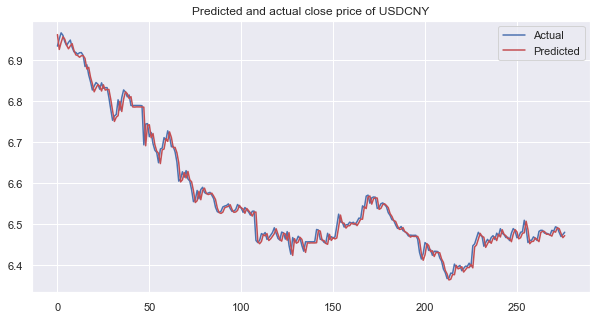

In [102]:
plt.figure(figsize=(10,5))
plt.title('Predicted and actual close price of USDCNY')
plt.plot(testY , label = 'Actual', color = 'b')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, y_pred)

0.0002610251037346049

In [104]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testY, y_pred)

0.011447768338750873

In [105]:
from sklearn.metrics import r2_score
print("Test R2:",r2_score(testY, y_pred))

Test R2: 0.9884286955023537


In [106]:
mape_test = np.mean(np.abs((y_pred- testY) / testY)) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.17%


In [107]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=5):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [108]:
# reshape
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [109]:
print(trainX, trainY)

[[0.48866411 0.47854901 0.49337286 0.47636903 0.5103767 ]
 [0.47854901 0.49337286 0.47636903 0.5103767  0.51124869]
 [0.49337286 0.47636903 0.5103767  0.51124869 0.51866062]
 ...
 [0.7393617  0.74110569 0.74023369 0.73866411 0.73273457]
 [0.74110569 0.74023369 0.73866411 0.73273457 0.73282176]
 [0.74023369 0.73866411 0.73273457 0.73282176 0.73857691]] [0.51124869 0.51866062 0.50470875 ... 0.73282176 0.73857691 0.75095919]


In [110]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [111]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, activation='tanh',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=11, batch_size=1)

Epoch 1/11
2227/2227 [==============================] - 7s 2ms/step - loss: 0.0027
Epoch 2/11
2227/2227 [==============================] - 5s 2ms/step - loss: 3.5132e-04
Epoch 3/11
2227/2227 [==============================] - 5s 2ms/step - loss: 3.1298e-04
Epoch 4/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.8678e-04
Epoch 5/11
2227/2227 [==============================] - 6s 3ms/step - loss: 2.5987e-04
Epoch 6/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.4400e-04
Epoch 7/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.2878e-04
Epoch 8/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.3762e-04
Epoch 9/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.2536e-04
Epoch 10/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.1689e-04
Epoch 11/11
2227/2227 [==============================] - 5s 2ms/step - loss: 2.2723e-04


In [112]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 16)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [113]:
scaler.scale_

y_pred = model.predict(testX)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[6.9385357]
 [6.9300475]
 [6.9193726]
 [6.9203877]
 [6.925644 ]
 [6.916473 ]
 [6.905785 ]
 [6.901093 ]
 [6.8965826]
 [6.898501 ]]


In [114]:
testY = np.array(testY).reshape(-1,1)
testY = scaler.inverse_transform(testY)
print(testY[:10])

[[6.9453]
 [6.9362]
 [6.9436]
 [6.9494]
 [6.9318]
 [6.9208]
 [6.9192]
 [6.9148]
 [6.9185]
 [6.9189]]


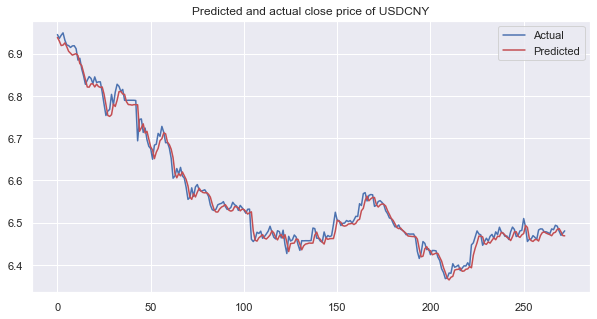

In [115]:
plt.figure(figsize=(10,5))
plt.title('Predicted and actual close price of USDCNY')
plt.plot(testY , label = 'Actual', color = 'b')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, y_pred)

0.0002904361420043971

In [117]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testY, y_pred)

0.012676918957609008

In [118]:
from sklearn.metrics import r2_score
print("Test R2:",r2_score(testY, y_pred))

Test R2: 0.9859287254239936


In [119]:
mape_test = np.mean(np.abs((y_pred- testY) / testY)) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.19%


In [120]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=7):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [121]:
# reshape
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [122]:
print(trainX, trainY)

[[0.48866411 0.47854901 0.49337286 ... 0.5103767  0.51124869 0.51866062]
 [0.47854901 0.49337286 0.47636903 ... 0.51124869 0.51866062 0.50470875]
 [0.49337286 0.47636903 0.5103767  ... 0.51866062 0.50470875 0.49093129]
 ...
 [0.73604813 0.73386815 0.7393617  ... 0.74023369 0.73866411 0.73273457]
 [0.73386815 0.7393617  0.74110569 ... 0.73866411 0.73273457 0.73282176]
 [0.7393617  0.74110569 0.74023369 ... 0.73273457 0.73282176 0.73857691]] [0.50470875 0.49093129 0.49223927 ... 0.73282176 0.73857691 0.75095919]


In [123]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [124]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, activation='tanh',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=11, batch_size=1)

Epoch 1/11
2225/2225 [==============================] - 6s 2ms/step - loss: 0.0026
Epoch 2/11
2225/2225 [==============================] - 4s 2ms/step - loss: 4.2332e-04
Epoch 3/11
2225/2225 [==============================] - 5s 2ms/step - loss: 3.5877e-04
Epoch 4/11
2225/2225 [==============================] - 5s 2ms/step - loss: 3.1468e-04
Epoch 5/11
2225/2225 [==============================] - 5s 2ms/step - loss: 2.9432e-04
Epoch 6/11
2225/2225 [==============================] - 4s 2ms/step - loss: 2.7910e-04
Epoch 7/11
2225/2225 [==============================] - 4s 2ms/step - loss: 2.6208e-04
Epoch 8/11
2225/2225 [==============================] - 5s 2ms/step - loss: 2.4343e-04A: 0s - loss: 2.48
Epoch 9/11
2225/2225 [==============================] - 5s 2ms/step - loss: 2.4774e-04
Epoch 10/11
2225/2225 [==============================] - 5s 2ms/step - loss: 2.3859e-04
Epoch 11/11
2225/2225 [==============================] - 6s 3ms/step - loss: 2.3390e-04


In [125]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 16)                1536      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________


In [126]:
scaler.scale_

y_pred = model.predict(testX)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[6.9200335]
 [6.918768 ]
 [6.9204373]
 [6.91305  ]
 [6.9043465]
 [6.8997054]
 [6.8943787]
 [6.8933325]
 [6.8952203]
 [6.8931203]]


In [127]:
testY = np.array(testY).reshape(-1,1)
testY = scaler.inverse_transform(testY)
print(testY[:10])

[[6.9436]
 [6.9494]
 [6.9318]
 [6.9208]
 [6.9192]
 [6.9148]
 [6.9185]
 [6.9189]
 [6.9119]
 [6.8849]]


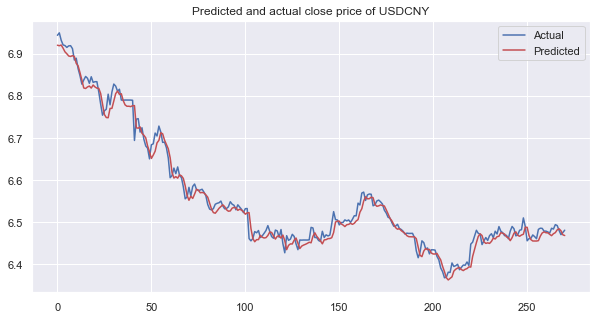

In [128]:
plt.figure(figsize=(10,5))
plt.title('Predicted and actual close price of USDCNY')
plt.plot(testY , label = 'Actual', color = 'b')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [129]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, y_pred)

0.00033502502277785683

In [130]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testY, y_pred)

0.01399870482722775

In [131]:
from sklearn.metrics import r2_score
print("Test R2:",r2_score(testY, y_pred))

Test R2: 0.9830030697334917


In [132]:
mape_test = np.mean(np.abs((y_pred- testY) / testY)) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.21%


In [133]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [134]:
# reshape
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [135]:
print(trainX, trainY)

[[0.48866411 0.47854901 0.49337286]
 [0.47854901 0.49337286 0.47636903]
 [0.49337286 0.47636903 0.5103767 ]
 ...
 [0.74023369 0.73866411 0.73273457]
 [0.73866411 0.73273457 0.73282176]
 [0.73273457 0.73282176 0.73857691]] [0.47636903 0.5103767  0.51124869 ... 0.73282176 0.73857691 0.75095919]


In [136]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [137]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, activation='tanh',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=11, batch_size=1)

Epoch 1/11
2229/2229 [==============================] - 7s 2ms/step - loss: 0.0040
Epoch 2/11
2229/2229 [==============================] - 6s 3ms/step - loss: 2.5037e-04
Epoch 3/11
2229/2229 [==============================] - 5s 2ms/step - loss: 2.4387e-04
Epoch 4/11
2229/2229 [==============================] - 5s 2ms/step - loss: 2.3160e-04A: 0s - 
Epoch 5/11
2229/2229 [==============================] - 6s 3ms/step - loss: 2.2061e-04
Epoch 6/11
2229/2229 [==============================] - 5s 2ms/step - loss: 2.2901e-04A: 0s - loss: 2.
Epoch 7/11
2229/2229 [==============================] - 5s 2ms/step - loss: 2.2743e-04
Epoch 8/11
2229/2229 [==============================] - 6s 3ms/step - loss: 2.2006e-04A: 0s - loss: 2.2092 - ETA: 0s - loss
Epoch 9/11
2229/2229 [==============================] - 5s 2ms/step - loss: 2.1687e-04
Epoch 10/11
2229/2229 [==============================] - 5s 2ms/step - loss: 2.1119e-04
Epoch 11/11
2229/2229 [==============================] - 5s 2ms/step - l

In [138]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [139]:
scaler.scale_

y_pred = model.predict(testX)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[6.9262986]
 [6.93677  ]
 [6.9380956]
 [6.9283495]
 [6.9185247]
 [6.919482 ]
 [6.9241667]
 [6.9156985]
 [6.9050384]
 [6.899952 ]]


In [140]:
testY = np.array(testY).reshape(-1,1)
testY = scaler.inverse_transform(testY)
print(testY[:10])

[[6.967 ]
 [6.9608]
 [6.9453]
 [6.9362]
 [6.9436]
 [6.9494]
 [6.9318]
 [6.9208]
 [6.9192]
 [6.9148]]


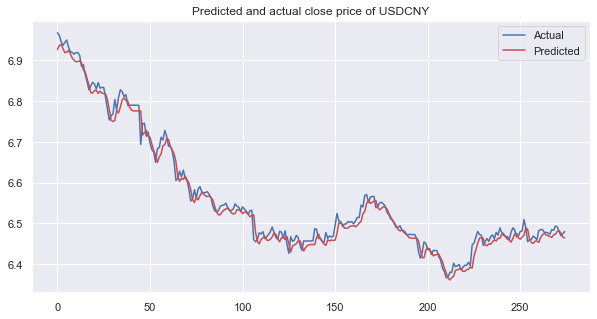

In [141]:
plt.figure(figsize=(10,5))
plt.title('Predicted and actual close price of USDCNY')
plt.plot(testY , label = 'Actual', color = 'b')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [142]:
from sklearn.metrics import r2_score
print("Test R2:",r2_score(testY, y_pred))

Test R2: 0.9845202045906686


In [143]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testY, y_pred)

0.01413011311479051

In [144]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, y_pred)

0.0003354792109473751

In [145]:
mape_test = np.mean(np.abs((y_pred- testY) / testY)) * 100
print('Testing MAPE is {:.2f}%'.format(mape_test))

Testing MAPE is 0.21%
